In [28]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
from scipy.stats import f_oneway

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data
df = pd.read_csv(r'C:\Users\kbase\OneDrive\Desktop\Portfolio Projects\Movies\Data\Movies.csv')

In [29]:
# Checking out the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [30]:
# Loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [31]:
# Handle missing values

df = df.dropna()

In [32]:
# Confirming missing data removed

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [33]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [34]:
# Change data types of columns to remove unneccesary decimal points

# df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
# df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [35]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [36]:
# Year column seems to differ from year in released in column
# Create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [37]:
# Order the data descending by gross income

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [38]:
pd.set_option('display.max_rows', None)

In [39]:
# Dropping any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

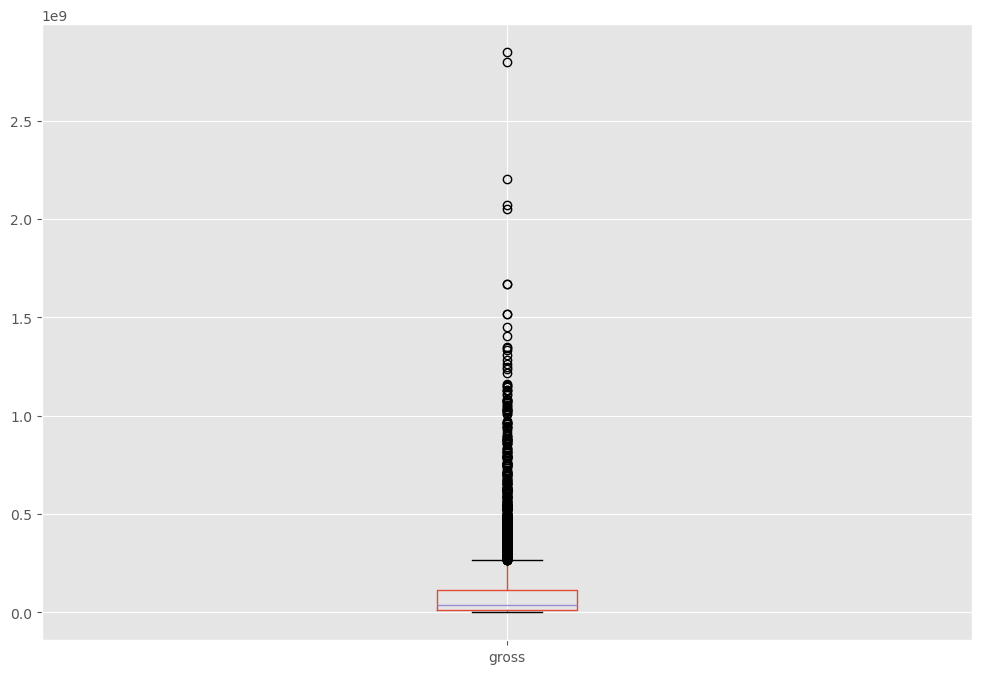

In [40]:
# Let's check for any outliers

df.boxplot(column=['gross'])
plt.show()

In [41]:
# Testing out the hypothesis:
# If a movie has a higher budget, then the gross income will become higher as well

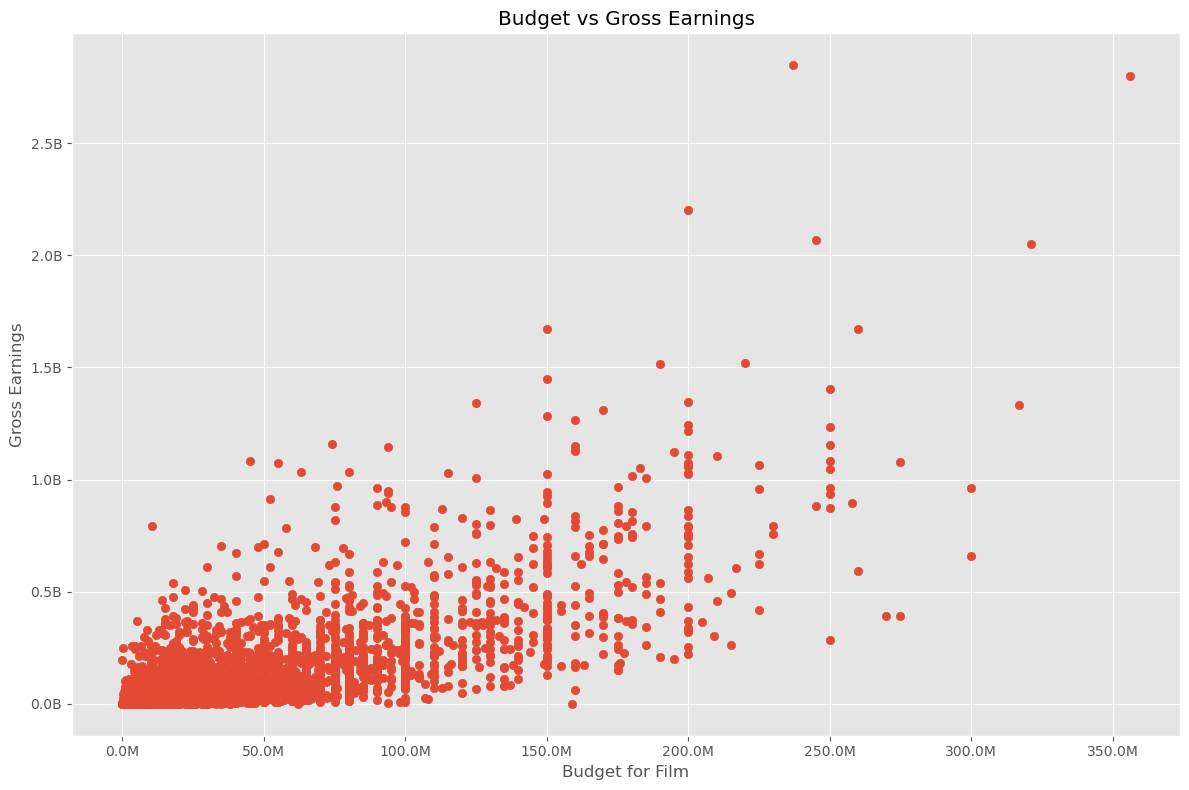

In [104]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

# Function to format ticks in millions (for the X axis) and billions (for the Y axis)
def millions(x, pos):
    return f'{x/1e6:.1f}M'

def billions(x, pos):
    return f'{x/1e9:.1f}B'

# Setting the tick format
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

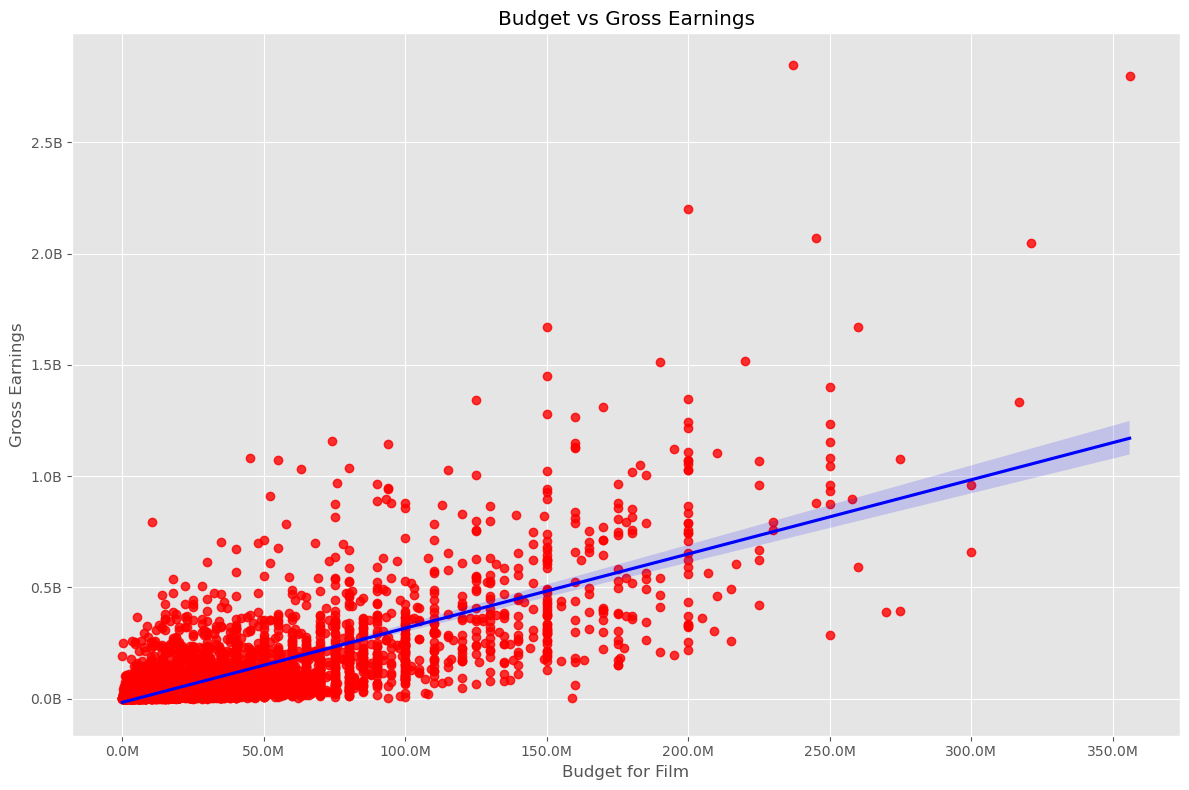

In [96]:
# Adding in a linear regression line
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y= 'gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

# Function to format ticks in millions (for the X axis) and billions (for the Y axis)
def millions(x, pos):
    return f'{x/1e6:.1f}M'

def billions(x, pos):
    return f'{x/1e9:.1f}B'

# Setting the tick format
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

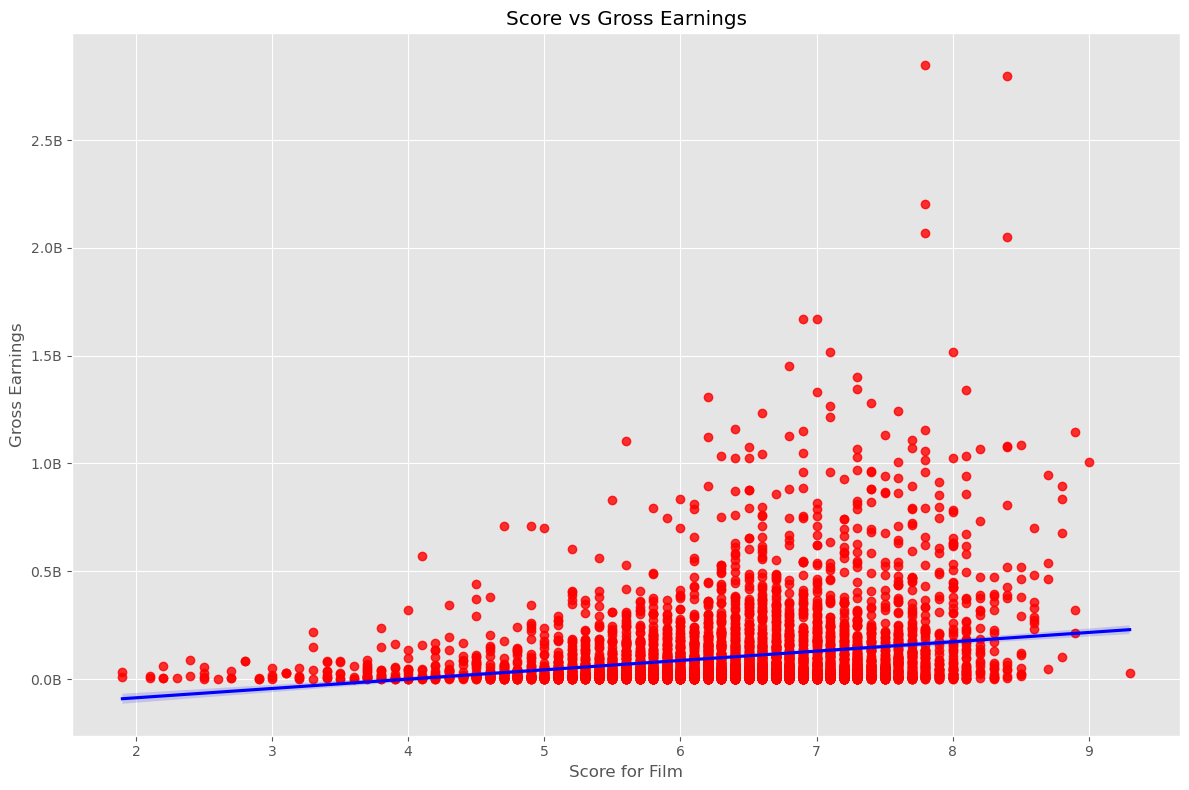

In [44]:
# Adding in a linear regression line
# Plot score vs gross using seaborn

sns.regplot(x="score", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.title('Score vs Gross Earnings')
plt.xlabel('Score for Film')
plt.ylabel('Gross Earnings')

# Function to format ticks in billions (for the Y axis)
def billions(x, pos):
    return f'{x/1e9:.1f}B'

# Setting the tick format
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

In [45]:
# Correlation Matrix between all numeric columns

df.select_dtypes(include=['number']).corr(method ='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [46]:
df.select_dtypes(include=['number']).corr(method ='kendall')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254,0.043400
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344,0.293044
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000,0.064793
yearcorrect,0.991304,0.043400,0.293044,0.213719,0.232372,0.064793,1.000000


In [47]:
df.select_dtypes(include=['number']).corr(method ='spearman')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
yearcorrect,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


In [48]:
correlation_mat = df.select_dtypes(include=['number']).corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

year         year           1.000000
             score          0.056386
             votes          0.206021
             budget         0.327722
             gross          0.274321
             runtime        0.075077
             yearcorrect    0.998726
score        year           0.056386
             score          1.000000
             votes          0.474256
             budget         0.072001
             gross          0.222556
             runtime        0.414068
             yearcorrect    0.061923
votes        year           0.206021
             score          0.474256
             votes          1.000000
             budget         0.439675
             gross          0.614751
             runtime        0.352303
             yearcorrect    0.203098
budget       year           0.327722
             score          0.072001
             votes          0.439675
             budget         1.000000
             gross          0.740247
             runtime        0.318695
 

In [49]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

year         score          0.056386
score        year           0.056386
yearcorrect  score          0.061923
score        yearcorrect    0.061923
             budget         0.072001
budget       score          0.072001
runtime      year           0.075077
year         runtime        0.075077
yearcorrect  runtime        0.075294
runtime      yearcorrect    0.075294
yearcorrect  votes          0.203098
votes        yearcorrect    0.203098
             year           0.206021
year         votes          0.206021
gross        score          0.222556
score        gross          0.222556
gross        yearcorrect    0.268721
yearcorrect  gross          0.268721
year         gross          0.274321
gross        year           0.274321
runtime      gross          0.275796
gross        runtime        0.275796
runtime      budget         0.318695
budget       runtime        0.318695
yearcorrect  budget         0.320312
budget       yearcorrect    0.320312
             year           0.327722
y

In [50]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.998726
year         yearcorrect    0.998726
             year           1.000000
budget       budget         1.000000
gross        gross          1.000000
votes        votes          1.000000
score        score          1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [51]:
# High correlation between budget and gross

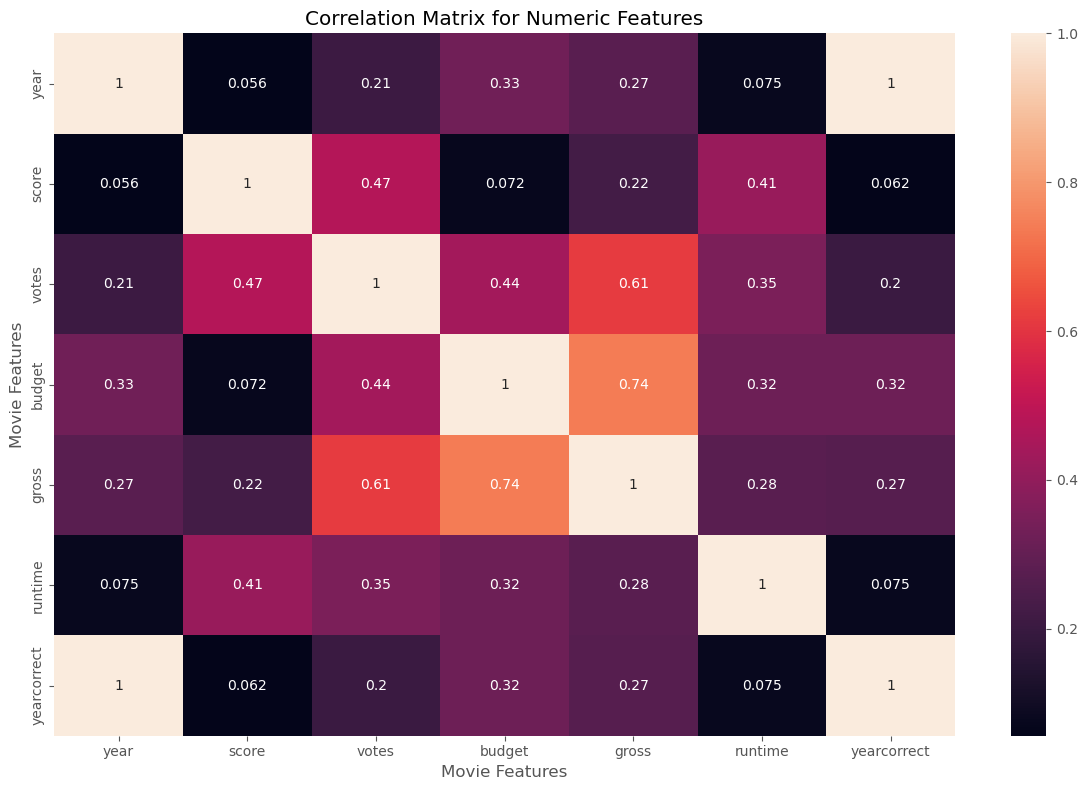

In [52]:
# Correlation Matrix 

correlation_matrix = df.select_dtypes(include=['number']).corr(method ='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.tight_layout()
plt.show()

In [53]:
# Looks at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [54]:
# Create groups based on 'company'
groups = [df['budget'][df['company'] == value] for value in df['company'].unique()]

# Apply ANOVA
anova_result = f_oneway(*groups)

print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

F-statistic: 1.9287100717699706
p-value: 3.667261711387093e-57


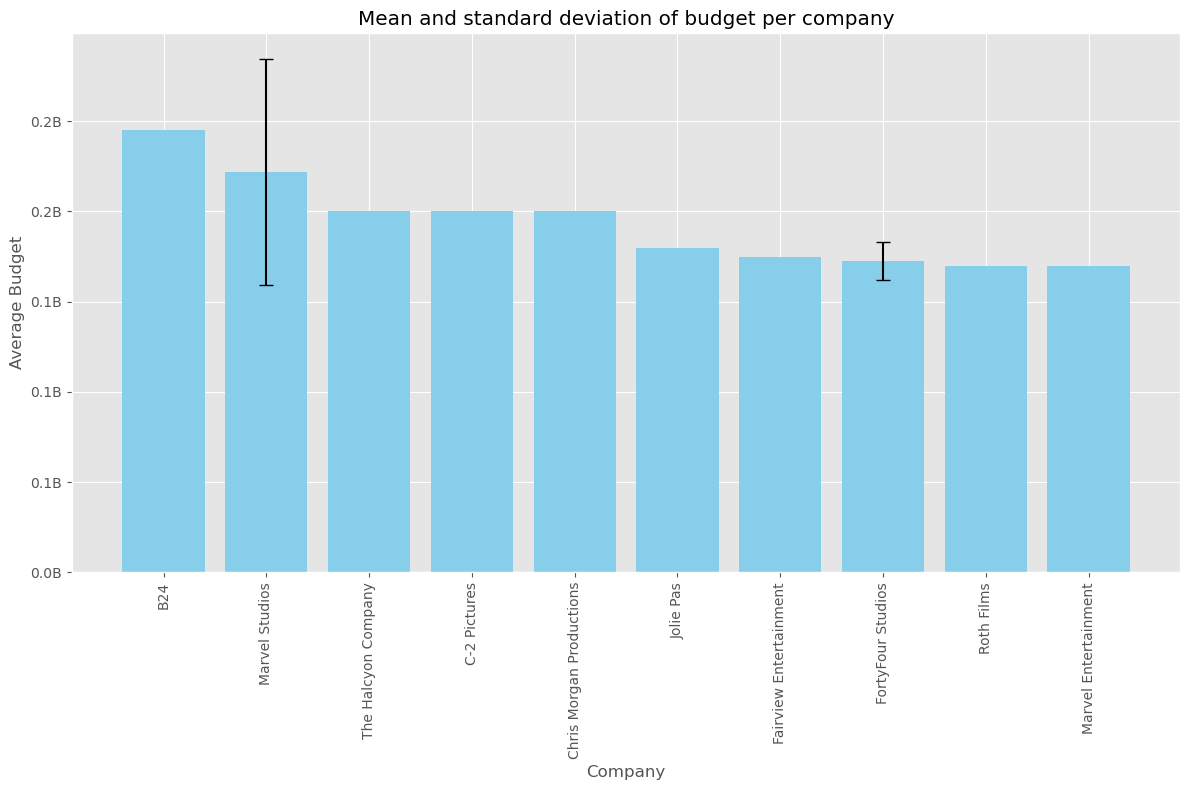

In [55]:
# Mean and standard deviation of budget per company

summary_stats = df.groupby('company')['budget'].agg(['mean', 'std']).reset_index()
summary_stats = summary_stats.sort_values(by='mean', ascending=False).head(10)

plt.bar(summary_stats['company'], summary_stats['mean'], yerr=summary_stats['std'], capsize=5, color='skyblue')
plt.xticks(rotation=90)

plt.title("Mean and standard deviation of budget per company")
plt.ylabel("Average Budget")
plt.xlabel("Company")

# Function to format ticks in billions (for the Y axis)
def billions(x, pos):
    return f'{x/1e9:.1f}B'

# Setting the tick format
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

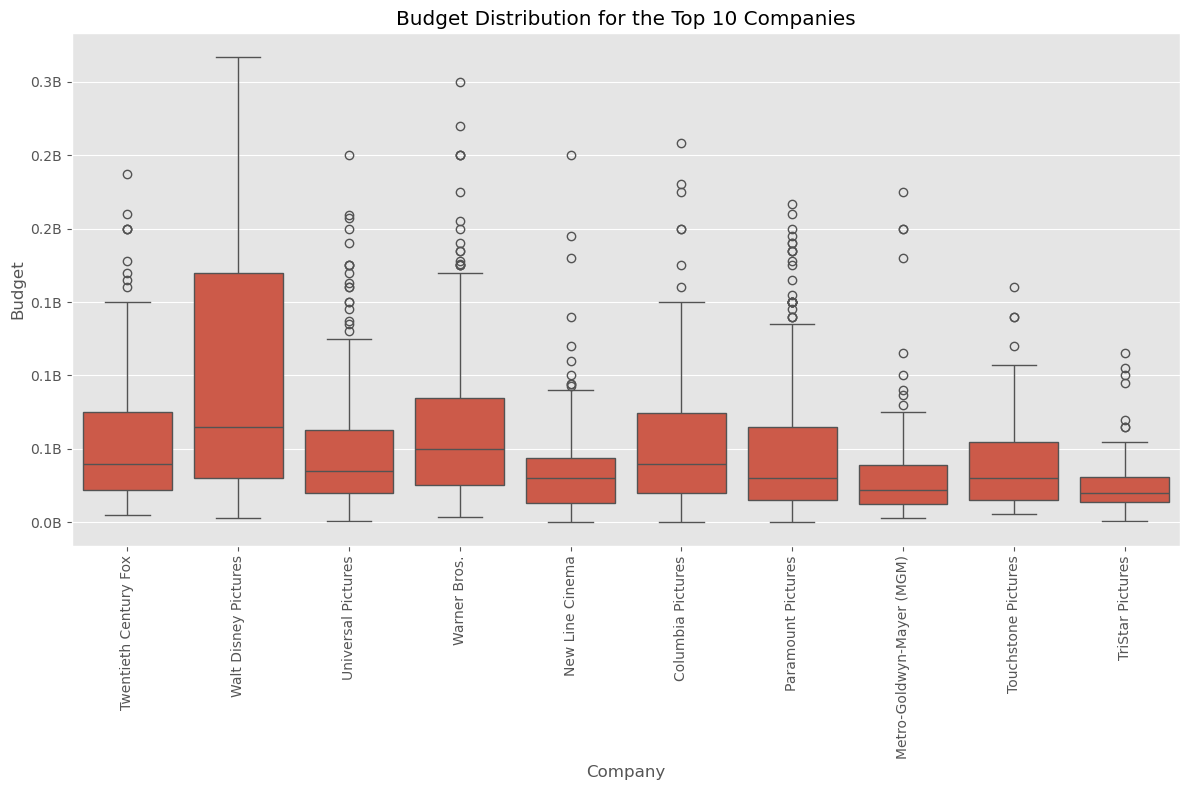

In [56]:
# Budget Distribution for the Top 10 Companies

top_companies = df['company'].value_counts().head(10).index
df_filtered = df[df['company'].isin(top_companies)]

sns.boxplot(x='company', y='budget', data=df_filtered)
plt.xticks(rotation=90)

plt.title("Budget Distribution for the Top 10 Companies")
plt.xlabel('Company')
plt.ylabel('Budget')

# Function to format ticks in billions (for the Y axis)
def billions(x, pos):
    return f'{x/1e9:.1f}B'

# Setting the tick format
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

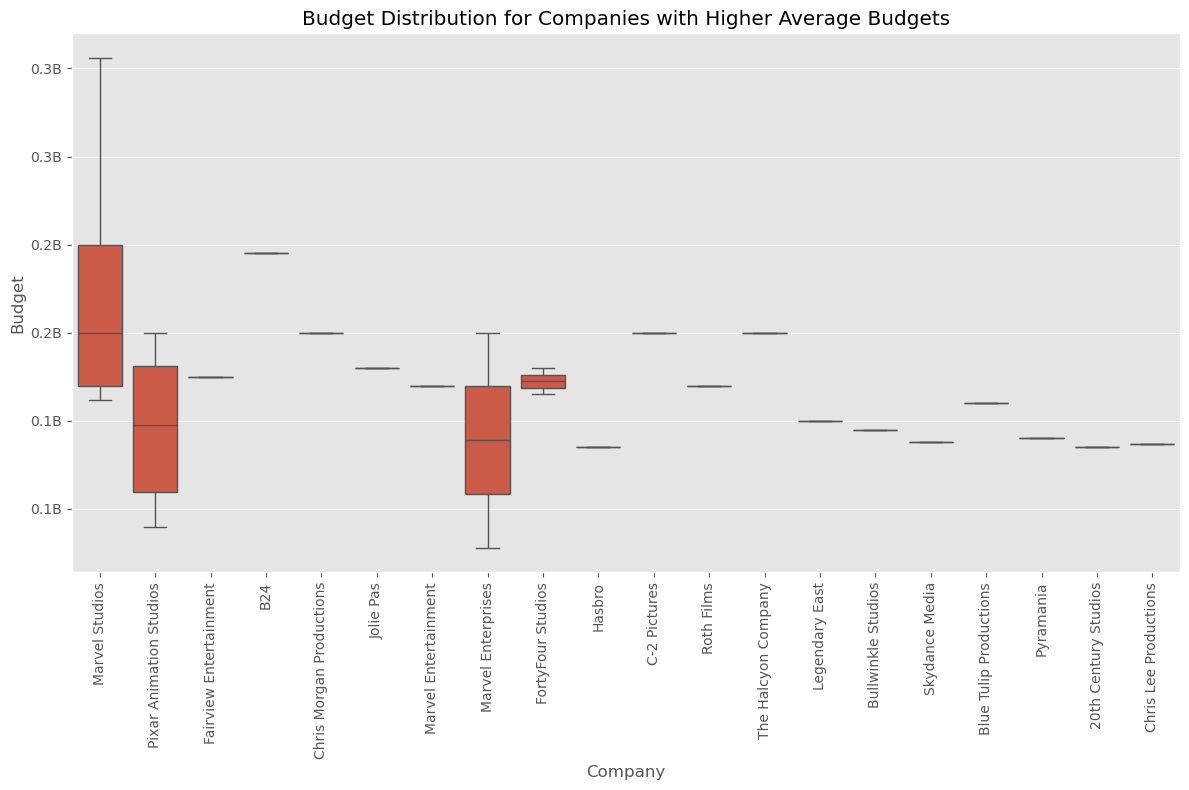

In [57]:
# Budget Distribution for Companies with Higher Average Budgets

avg_budget_per_company = df.groupby('company')['budget'].mean().sort_values(ascending=False).head(20).index
df_filtered = df[df['company'].isin(avg_budget_per_company)]

sns.boxplot(x='company', y='budget', data=df_filtered)
plt.xticks(rotation=90)

plt.title("Budget Distribution for Companies with Higher Average Budgets")
plt.xlabel('Company')
plt.ylabel('Budget')

# Function to format ticks in billions (for the Y axis)
def billions(x, pos):
    return f'{x/1e9:.1f}B'

# Setting the tick format
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

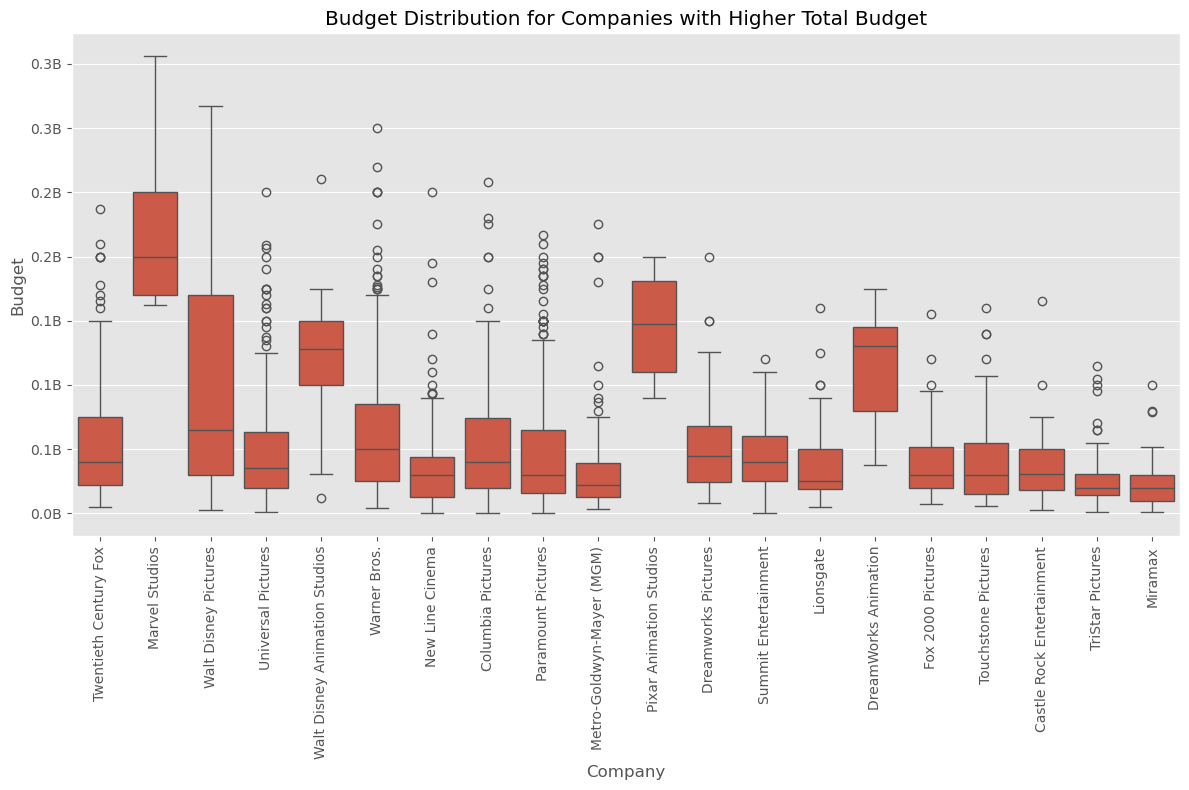

In [58]:
# Budget Distribution for Companies with Higher Total Budget

total_budget_per_company = df.groupby('company')['budget'].sum().sort_values(ascending=False).head(20).index
df_filtered = df[df['company'].isin(total_budget_per_company)]

sns.boxplot(x='company', y='budget', data=df_filtered)
plt.xticks(rotation=90)

plt.title("Budget Distribution for Companies with Higher Total Budget")
plt.xlabel('Company')
plt.ylabel('Budget')

# Function to format ticks in billions (for the Y axis)
def billions(x, pos):
    return f'{x/1e9:.1f}B'

# Setting the tick format
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

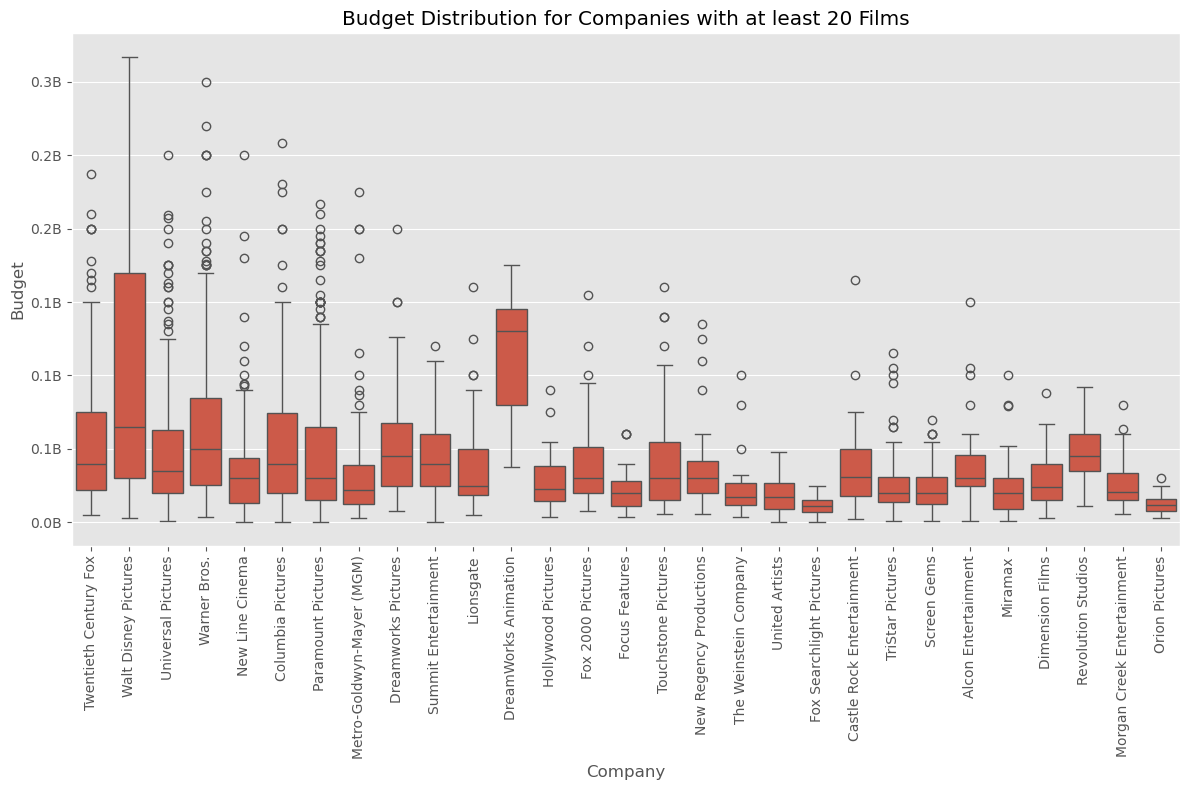

In [59]:
# Budget Distribution for Companies with at least 20 Films

frequent_companies = df['company'].value_counts()[df['company'].value_counts() >= 20].index
df_filtered = df[df['company'].isin(frequent_companies)]

sns.boxplot(x='company', y='budget', data=df_filtered)
plt.xticks(rotation=90)

plt.title("Budget Distribution for Companies with at least 20 Films")
plt.xlabel('Company')
plt.ylabel('Budget')

# Function to format ticks in billions (for the Y axis)
def billions(x, pos):
    return f'{x/1e9:.1f}B'

# Setting the tick format
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()

In [60]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation